## Лабораторная работа 1: Классификация MNIST

**Антонов Михаил Евгеньевич, М-26**

Загрузка данных MNIST...


Данные: (70000, 784)
Метки: (70000,)
Классы: [0 1 2 3 4 5 6 7 8 9]

Обучающая выборка: (60000, 784)
Тестовая выборка: (10000, 784)


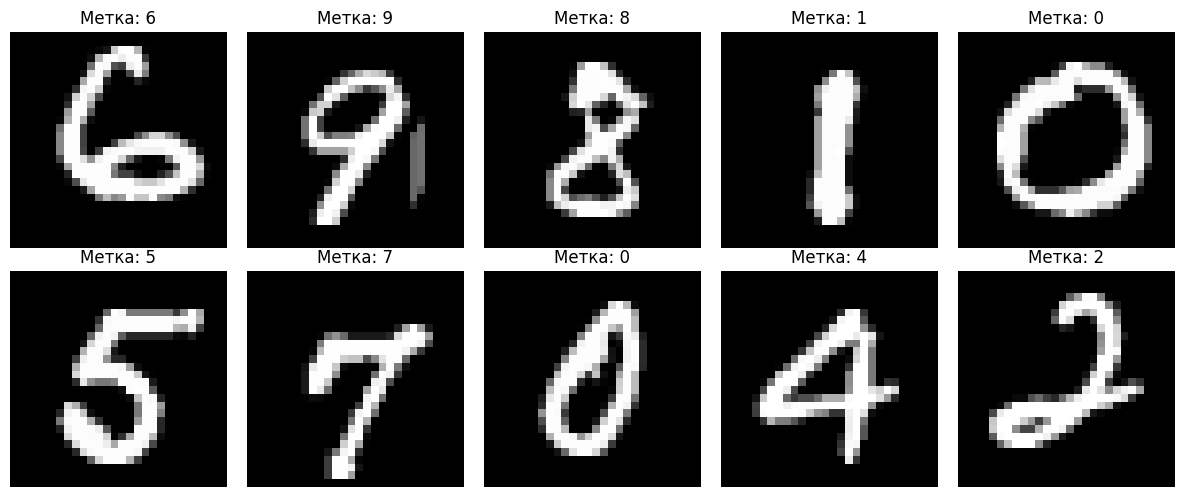


Статистика по интенсивности пикселей:
  Минимум: 0
  Максимум: 255
  Среднее: 33.40
  Std: 78.67


In [1]:
from typing import Tuple, List, Dict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Константы
RNG_SEED = 42
TEST_SIZE = 10000

np.random.seed(RNG_SEED)

# Загрузка данных MNIST
print("Загрузка данных MNIST...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target
y = y.astype(int)

print(f"Данные: {X.shape}")
print(f"Метки: {y.shape}")
print(f"Классы: {np.unique(y)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RNG_SEED, stratify=y
)

print(f"\nОбучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Визуализация примеров
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Метка: {y_train.iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Статистика
print("\nСтатистика по интенсивности пикселей:")
print(f"  Минимум: {X_train.values.min()}")
print(f"  Максимум: {X_train.values.max()}")
print(f"  Среднее: {X_train.values.mean():.2f}")
print(f"  Std: {X_train.values.std():.2f}")

### Выводы по исследованию данных MNIST

#### 1. Что представляют собой признаки?
В задаче компьютерного зрения с датасетом MNIST:
- **Каждый признак** - это интенсивность одного пикселя изображения размером 28×28
- **Всего признаков**: 784 (28 × 28 пикселей)
- **Диапазон значений**: от 0 (чёрный/фон) до 255 (белый/максимальная интенсивность)

#### 2. Нуждается ли набор признаков в нормализации?
**Да, нормализация необходима** по следующим причинам:

1. **Масштаб признаков**: Все признаки (пиксели) имеют одинаковую природу и измеряются в одинаковых единицах (интенсивность от 0 до 255), но:
   - Значения сосредоточены в диапазоне ~0-255
   - При использовании метрик расстояния (например, для kNN) большие абсолютные значения могут доминировать

2. **Для kNN и методов, основанных на расстояниях**:
   - Без нормализации пиксели с высокой интенсивностью будут иметь больший "вес"
   - Это может исказить реальное сходство между изображениями

3. **Для методов, чувствительных к масштабу** (например, градиентный спуск в нейронных сетях):
   - Нормализация ускоряет сходимость
   - Стабилизирует процесс обучения

4. **Типы нормализации для MNIST**:
   - **Min-Max scaling**: приведение к диапазону [0, 1] (деление на 255)
   - **Standardization**: приведение к нулевому среднему и единичной дисперсии
   - Для MNIST часто используется простое деление на 255.0

#### 3. Особенности распределения данных:
- Распределение пикселей не является нормальным (бимодальное)
- Большинство пикселей имеют низкую интенсивность (фон)
- Пиксели с высокой интенсивностью соответствуют штрихам цифр

АНАЛИЗ НЕОБХОДИМОСТИ НОРМАЛИЗАЦИИ

Исходные данные (первые 5 пикселей из каждого изображения):
Цифра 6: [0 0 0 0 0]...
Цифра 9: [0 0 0 0 0]...
Цифра 5: [0 0 0 0 0]...
Цифра 0: [0 0 0 0 0]...

Расстояния между изображениями (Евклидова метрика):

БЕЗ НОРМАЛИЗАЦИИ:
Между 0 и 1 (Разные цифры 6 и 9): 2756.44
Между 0 и 2 (Разные цифры 6 и 5): 3057.79
Между 0 и 3 (Разные цифры 6 и 0): 3272.61
Между 1 и 2 (Разные цифры 9 и 5): 2507.59
Между 1 и 3 (Разные цифры 9 и 0): 2853.80
Между 2 и 3 (Разные цифры 5 и 0): 2401.45



С НОРМАЛИЗАЦИЕЙ Min-Max [0, 1]:
Между 0 и 1 (Разные цифры 6 и 9): 10.81
Между 0 и 2 (Разные цифры 6 и 5): 11.99
Между 0 и 3 (Разные цифры 6 и 0): 12.83
Между 1 и 2 (Разные цифры 9 и 5): 9.83
Между 1 и 3 (Разные цифры 9 и 0): 11.19
Между 2 и 3 (Разные цифры 5 и 0): 9.42


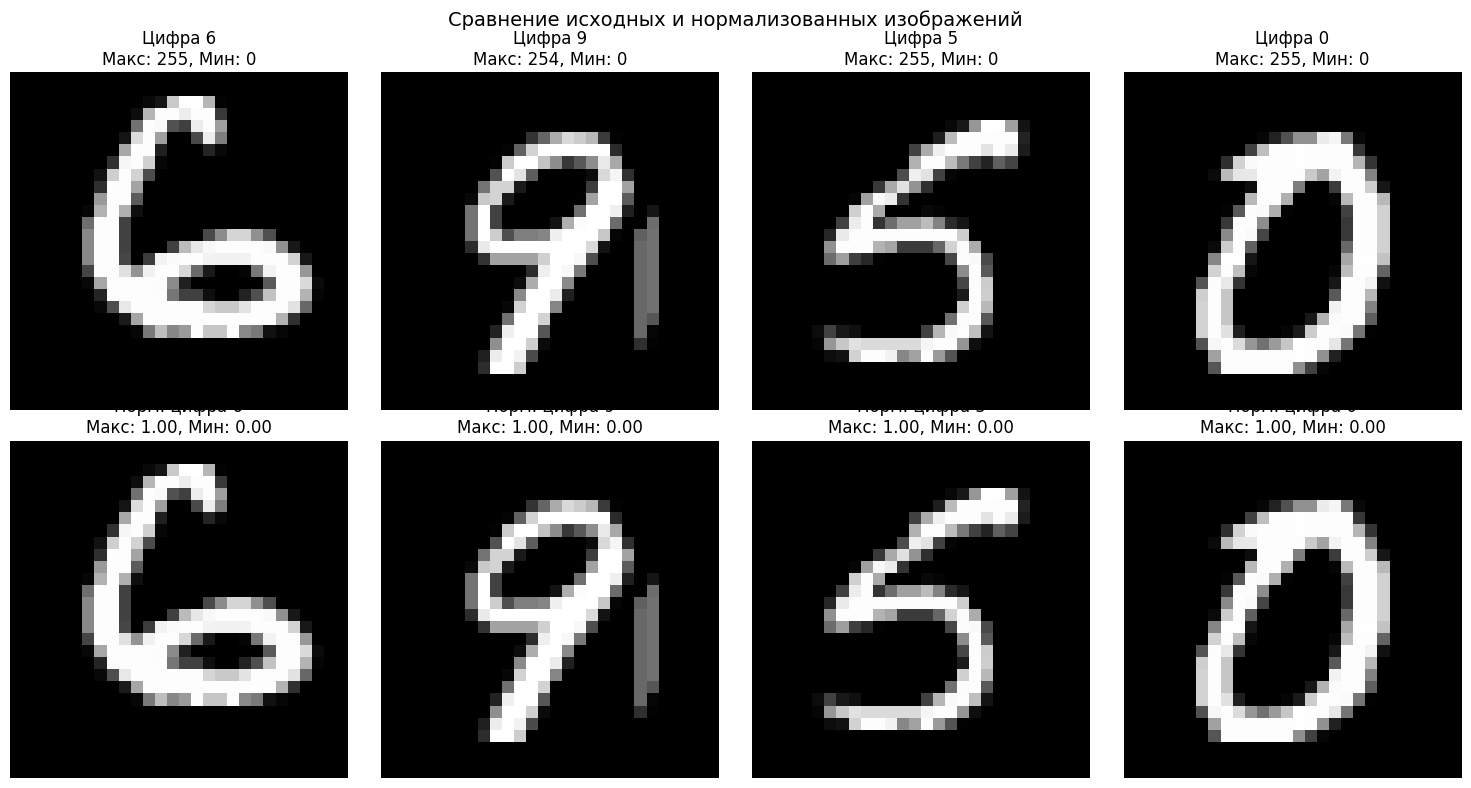


СТАТИСТИКА ДО И ПОСЛЕ НОРМАЛИЗАЦИИ

ДО нормализации:
Среднее по всем пикселям: 33.40


Стандартное отклонение: 78.67
Минимальное значение: 0
Максимальное значение: 255

ПОСЛЕ нормализации Min-Max [0, 1]:
Среднее по всем пикселям: 0.1310
Стандартное отклонение: 0.3085
Минимальное значение: 0.0000


Максимальное значение: 1.0000


In [2]:
# Анализ необходимости нормализации
print("="*60)
print("АНАЛИЗ НЕОБХОДИМОСТИ НОРМАЛИЗАЦИИ")
print("="*60)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Выберем несколько изображений для анализа расстояний
idx_samples = [0, 1, 100, 101]  # Две пары похожих цифр
samples = X_train.iloc[idx_samples].values
labels = y_train.iloc[idx_samples].values

print("\nИсходные данные (первые 5 пикселей из каждого изображения):")
for i, (sample, label) in enumerate(zip(samples, labels)):
    print(f"Цифра {label}: {sample[:5].round(2)}...")

# Вычисление евклидовых расстояний между изображениями
from scipy.spatial.distance import euclidean

print("\n" + "="*60)
print("Расстояния между изображениями (Евклидова метрика):")
print("="*60)

# Расстояния без нормализации
distances_raw = []
for i in range(len(samples)):
    for j in range(i+1, len(samples)):
        dist = euclidean(samples[i], samples[j])
        distances_raw.append(((i, j), dist, labels[i], labels[j]))

print("\nБЕЗ НОРМАЛИЗАЦИИ:")
for (i, j), dist, label1, label2 in distances_raw:
    similarity = "Похожие" if label1 == label2 else "Разные"
    print(f"Между {i} и {j} ({similarity} цифры {label1} и {label2}): {dist:.2f}")

# Нормализация Min-Max
mm_scaler = MinMaxScaler()
X_normalized_mm = mm_scaler.fit_transform(X_train)
samples_norm_mm = X_normalized_mm[idx_samples]

print("\nС НОРМАЛИЗАЦИЕЙ Min-Max [0, 1]:")
distances_norm_mm = []
for i in range(len(samples_norm_mm)):
    for j in range(i+1, len(samples_norm_mm)):
        dist = euclidean(samples_norm_mm[i], samples_norm_mm[j])
        distances_norm_mm.append(((i, j), dist, labels[i], labels[j]))
        similarity = "Похожие" if labels[i] == labels[j] else "Разные"
        print(f"Между {i} и {j} ({similarity} цифры {labels[i]} и {labels[j]}): {dist:.2f}")

# Визуализация эффекта нормализации
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Исходные изображения
for idx, (ax, sample_idx) in enumerate(zip(axes[0, :4], idx_samples)):
    img = X_train.iloc[sample_idx].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Цифра {y_train.iloc[sample_idx]}\nМакс: {img.max()}, Мин: {img.min()}')
    ax.axis('off')

# Нормализованные изображения
for idx, (ax, sample_idx) in enumerate(zip(axes[1, :4], idx_samples)):
    img = samples_norm_mm[idx].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Норм. цифра {y_train.iloc[sample_idx]}\nМакс: {img.max():.2f}, Мин: {img.min():.2f}')
    ax.axis('off')

plt.suptitle('Сравнение исходных и нормализованных изображений', fontsize=14)
plt.tight_layout()
plt.show()

# Статистика до и после нормализации
print("\n" + "="*60)
print("СТАТИСТИКА ДО И ПОСЛЕ НОРМАЛИЗАЦИИ")
print("="*60)

print("\nДО нормализации:")
print(f"Среднее по всем пикселям: {X_train.values.mean():.2f}")
print(f"Стандартное отклонение: {X_train.values.std():.2f}")
print(f"Минимальное значение: {X_train.values.min()}")
print(f"Максимальное значение: {X_train.values.max()}")

print("\nПОСЛЕ нормализации Min-Max [0, 1]:")
print(f"Среднее по всем пикселям: {X_normalized_mm.mean():.4f}")
print(f"Стандартное отклонение: {X_normalized_mm.std():.4f}")
print(f"Минимальное значение: {X_normalized_mm.min():.4f}")
print(f"Максимальное значение: {X_normalized_mm.max():.4f}")

## 2. Постановка задачи

### Целевая переменная
**Целевая переменная (target)**: Метка класса (digit) от 0 до 9, соответствующая рукописной цифре на изображении.

### Выбранные метрики качества

1. **Accuracy (Точность)**:
   
   $$ \text{Accuracy} = \frac{\text{Число верных предсказаний}}{\text{Общее число примеров}} $$
   
   - **Почему для MNIST?**: Классы сбалансированы (примерно по 6000-7000 примеров каждого класса), поэтому accuracy является адекватной метрикой.

2. **F1-score (F1-мера)**:
   
   $$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$
   
   - **Почему для MNIST?**:
     - Позволяет оценить качество по каждому классу отдельно
     - Учитывает и precision (точность), и recall (полноту)
     - Важно для выявления "сложных" цифр (например, 4 vs 9, 3 vs 8)

3. **Confusion Matrix (Матрица ошибок)**:
   - Визуализация ошибок классификации
   - Показывает, какие классы путает модель

### Функция потерь

Для задачи классификации с алгоритмами kNN и Наивный Байес:

1. **Для kNN**: Не используется явная функция потерь при обучении (ленивое обучение), но при предсказании минимизируется:
   
   $$ \text{Потеря} = \text{Расстояние до ближайших соседей} $$

2. **Для Наивного Байеса**: Максимизация апостериорной вероятности:
   
   $$ \hat{y} = \arg\max_{c \in C} P(c|X) = \arg\max_{c \in C} P(c) \prod_{i=1}^{n} P(x_i|c) $$
   
   Что эквивалентно минимизации отрицательного логарифма правдоподобия.

### Разница между функцией потерь и метрикой качества

| Аспект | Функция потерь (Loss Function) | Метрика качества (Metric) |
|--------|-------------------------------|---------------------------|
| **Цель** | Оптимизация в процессе обучения | Оценка конечного качества |
| **Использование** | Внутри алгоритма обучения | После обучения, для оценки |
| **Примеры** | MSE, Cross-Entropy, Hinge Loss | Accuracy, F1, Precision, Recall |
| **Свойства** | Должна быть дифференцируема (для градиентных методов) | Должна быть интерпретируема |
| **Для kNN** | Не используется явно (метод based) | Применяется для выбора k и метрики |

В контексте MNIST:
- **Loss** помогает алгоритму "учиться" (кроме kNN)
- **Metrics** помогают нам оценить, насколько хорошо алгоритм работает

## 3. Реализация kNN классификатора

### Теоретическая основа
k-ближайших соседей (kNN) — алгоритм классификации, основанный на принципе близости объектов в пространстве признаков.

**Алгоритм:**
1. Для каждого тестового объекта вычисляются расстояния до всех обучающих объектов
2. Выбираются k ближайших соседей
3. Класс определяется голосованием большинства среди k соседей

### Гиперпараметры kNN:
1. **k** — количество соседей
2. **Метрика расстояния**:
   - Евклидово расстояние: $d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$
   - Манхэттенское расстояние: $d(x,y) = \sum_{i=1}^n |x_i - y_i|$
   - Косинусное расстояние: $d(x,y) = 1 - \frac{x \cdot y}{||x|| \cdot ||y||}$

### Особенности для MNIST:
- Высокая размерность (784 признака)
- Необходимость нормализации
- Вычислительная сложность O(n²) для наивной реализации

РЕАЛИЗАЦИЯ kNN КЛАССИФИКАТОРА

Подготовка данных...


Данные подготовлены. Размеры:
  Min-Max: (60000, 784), (10000, 784)
  Standard: (60000, 784), (10000, 784)
  /255: (60000, 784), (10000, 784)

ЭКСПЕРИМЕНТ 1: Влияние метрики расстояния (k=5)

--- Нормализация: Min-Max [0,1] ---


  Метрика: euclidean    | Accuracy: 0.9717 | Время: 1.69 сек


  Метрика: manhattan    | Accuracy: 0.9663 | Время: 30.55 сек


  Метрика: cosine       | Accuracy: 0.9757 | Время: 13.11 сек

--- Нормализация: StandardScaler ---


  Метрика: euclidean    | Accuracy: 0.9477 | Время: 1.53 сек


  Метрика: manhattan    | Accuracy: 0.9592 | Время: 29.00 сек


  Метрика: cosine       | Accuracy: 0.9441 | Время: 12.13 сек

--- Нормализация: /255 ---


  Метрика: euclidean    | Accuracy: 0.9717 | Время: 1.66 сек


  Метрика: manhattan    | Accuracy: 0.9663 | Время: 50.07 сек


  Метрика: cosine       | Accuracy: 0.9757 | Время: 13.65 сек

Сводная таблица результатов:
 normalization    metric  accuracy      time
 Min-Max [0,1] euclidean    0.9717  1.693083
 Min-Max [0,1] manhattan    0.9663 30.548888
 Min-Max [0,1]    cosine    0.9757 13.108598
StandardScaler euclidean    0.9477  1.526045
StandardScaler manhattan    0.9592 28.998989
StandardScaler    cosine    0.9441 12.134789
          /255 euclidean    0.9717  1.660325
          /255 manhattan    0.9663 50.066920
          /255    cosine    0.9757 13.654179


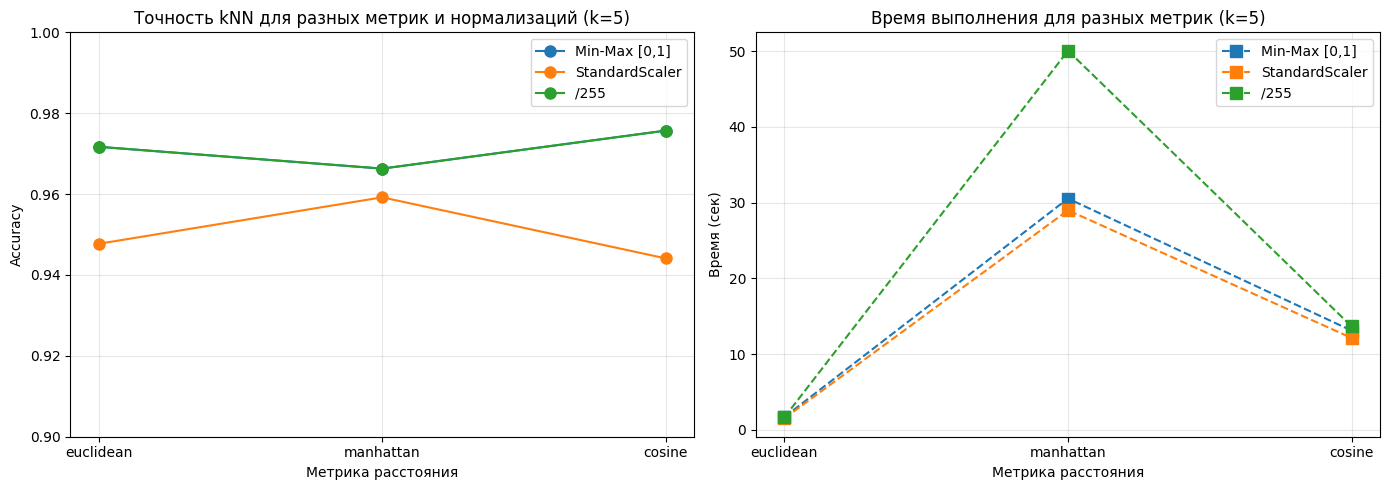


ЭКСПЕРИМЕНТ 2: Влияние параметра k (евклидова метрика)
Используем нормализацию: Min-Max [0,1]


  k= 1 | Accuracy: 0.9727 | Время: 1.85 сек


  k= 3 | Accuracy: 0.9736 | Время: 2.28 сек


  k= 5 | Accuracy: 0.9717 | Время: 1.75 сек


  k= 7 | Accuracy: 0.9702 | Время: 2.16 сек


  k= 9 | Accuracy: 0.9672 | Время: 1.72 сек


  k=11 | Accuracy: 0.9669 | Время: 2.23 сек


  k=15 | Accuracy: 0.9643 | Время: 1.56 сек


  k=21 | Accuracy: 0.9608 | Время: 1.56 сек


  k=31 | Accuracy: 0.9558 | Время: 2.06 сек


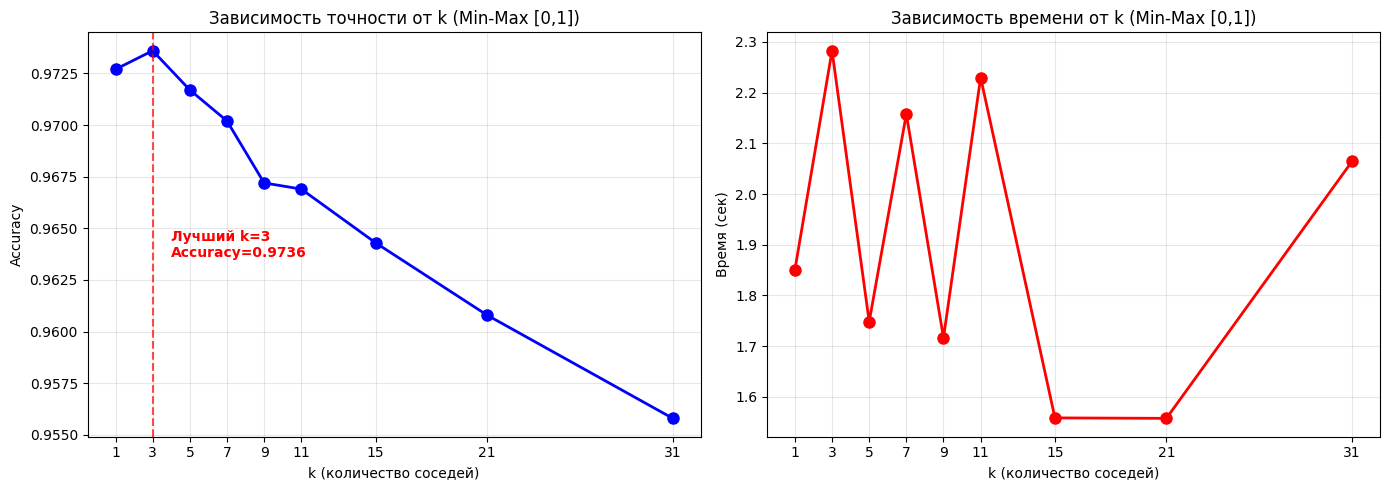


АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ kNN


Лучшие параметры: k=3, метрика=евклидова, нормализация=Min-Max [0,1]
Точность на тесте: 0.9736


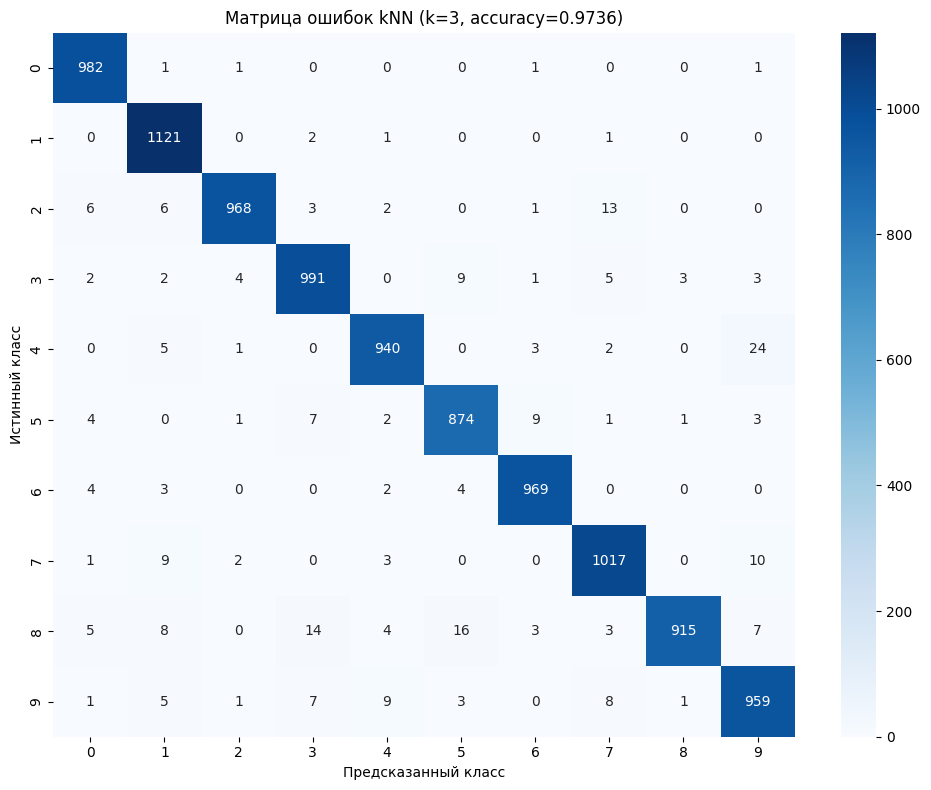


Анализ наиболее проблемных пар классов:

Топ-10 самых частых ошибок:
  4 → 9: 24 ошибок
  8 → 5: 16 ошибок
  8 → 3: 14 ошибок
  2 → 7: 13 ошибок
  7 → 9: 10 ошибок
  3 → 5: 9 ошибок
  5 → 6: 9 ошибок
  7 → 1: 9 ошибок
  9 → 4: 9 ошибок
  8 → 1: 8 ошибок

Визуализация примеров ошибок классификации:


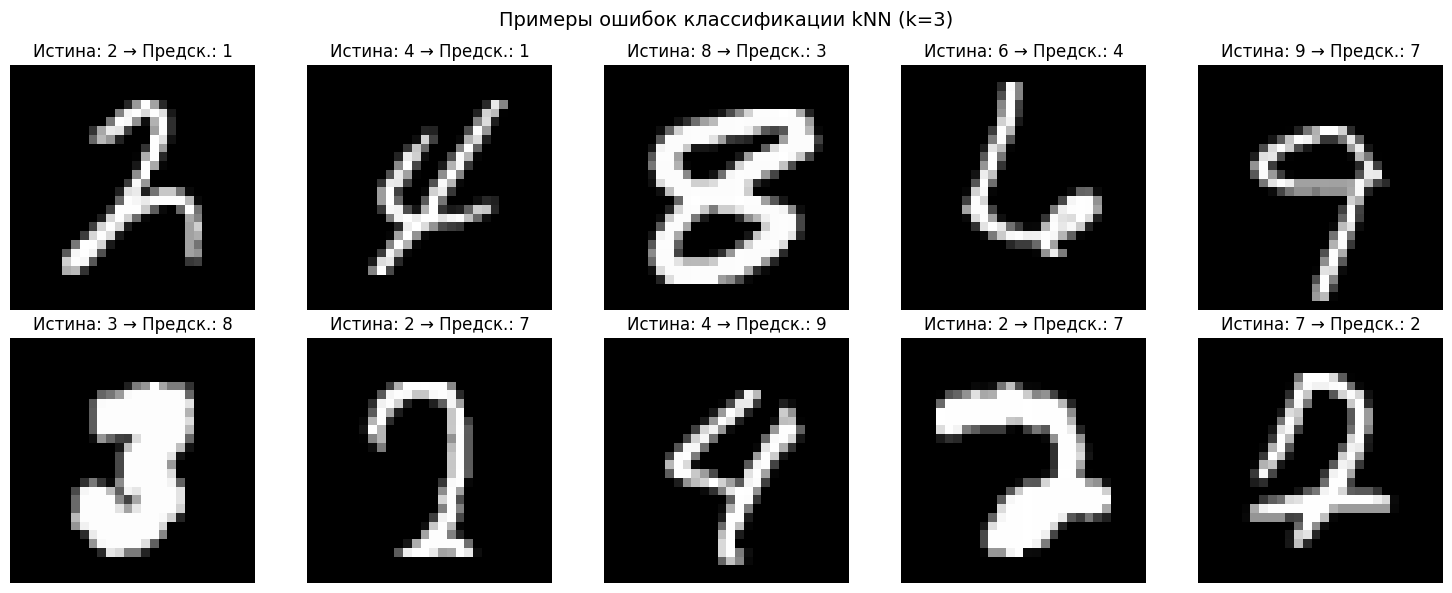

In [3]:
# 3. Реализация и сравнение kNN с разными метриками
print("="*60)
print("РЕАЛИЗАЦИЯ kNN КЛАССИФИКАТОРА")
print("="*60)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import time

# Нормализация данных (разные способы)
print("\nПодготовка данных...")

# Способ 1: Min-Max нормализация [0, 1]
mm_scaler = MinMaxScaler()
X_tr_norm = mm_scaler.fit_transform(X_train)
X_te_norm = mm_scaler.transform(X_test)

# Способ 2: StandardScaler (стандартизация)
std_scaler = StandardScaler()
X_tr_scaled = std_scaler.fit_transform(X_train)
X_te_scaled = std_scaler.transform(X_test)

# Способ 3: Просто деление на 255 (частый подход для MNIST)
X_tr_255 = X_train.values / 255.0
X_te_255 = X_test.values / 255.0

print(f"Данные подготовлены. Размеры:")
print(f"  Min-Max: {X_tr_norm.shape}, {X_te_norm.shape}")
print(f"  Standard: {X_tr_scaled.shape}, {X_te_scaled.shape}")
print(f"  /255: {X_tr_255.shape}, {X_te_255.shape}")

# Эксперимент 1: Влияние метрики расстояния (фиксированный k=5)
print("\n" + "="*60)
print("ЭКСПЕРИМЕНТ 1: Влияние метрики расстояния (k=5)")
print("="*60)

metrics = ['euclidean', 'manhattan', 'cosine']
normalizations = {
    'Min-Max [0,1]': (X_tr_norm, X_te_norm),
    'StandardScaler': (X_tr_scaled, X_te_scaled),
    '/255': (X_tr_255, X_te_255)
}

metric_results = []

for norm_name, (X_tr, X_te) in normalizations.items():
    print(f"\n--- Нормализация: {norm_name} ---")

    for metric in metrics:
        start_time = time.time()

        # Создание и обучение модели
        knn = KNeighborsClassifier(
            n_neighbors=5,
            metric=metric,
            n_jobs=-1  # Используем все ядра
        )

        knn.fit(X_tr, y_train)

        # Предсказание на тестовых данных
        y_pred = knn.predict(X_te)

        # Оценка качества
        accuracy = accuracy_score(y_test, y_pred)
        inference_time = time.time() - start_time

        metric_results.append({
            'normalization': norm_name,
            'metric': metric,
            'accuracy': accuracy,
            'time': inference_time
        })

        print(f"  Метрика: {metric:12s} | Accuracy: {accuracy:.4f} | Время: {inference_time:.2f} сек")

# Визуализация результатов
import pandas as pd
import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(metric_results)
print("\nСводная таблица результатов:")
print(metrics_df.to_string(index=False))

# График сравнения метрик
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График точности
for norm in metrics_df['normalization'].unique():
    subset = metrics_df[metrics_df['normalization'] == norm]
    axes[0].plot(subset['metric'], subset['accuracy'], 'o-', label=norm, markersize=8)

axes[0].set_title('Точность kNN для разных метрик и нормализаций (k=5)')
axes[0].set_xlabel('Метрика расстояния')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.9, 1.0)

# График времени выполнения
for norm in metrics_df['normalization'].unique():
    subset = metrics_df[metrics_df['normalization'] == norm]
    axes[1].plot(subset['metric'], subset['time'], 's--', label=norm, markersize=8)

axes[1].set_title('Время выполнения для разных метрик (k=5)')
axes[1].set_xlabel('Метрика расстояния')
axes[1].set_ylabel('Время (сек)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Эксперимент 2: Влияние параметра k
print("\n" + "="*60)
print("ЭКСПЕРИМЕНТ 2: Влияние параметра k (евклидова метрика)")
print("="*60)

k_values = [1, 3, 5, 7, 9, 11, 15, 21, 31]
results_k = []

# Используем лучшую нормализацию из предыдущего эксперимента
best_norm_name = metrics_df.loc[metrics_df['accuracy'].idxmax(), 'normalization']
best_norm_data = normalizations[best_norm_name]
X_tr_best, X_te_best = best_norm_data

print(f"Используем нормализацию: {best_norm_name}")

for k in k_values:
    start_time = time.time()

    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='euclidean',
        n_jobs=-1
    )

    knn.fit(X_tr_best, y_train)
    y_pred = knn.predict(X_te_best)

    accuracy = accuracy_score(y_test, y_pred)
    inference_time = time.time() - start_time

    results_k.append({
        'k': k,
        'accuracy': accuracy,
        'time': inference_time
    })

    print(f"  k={k:2d} | Accuracy: {accuracy:.4f} | Время: {inference_time:.2f} сек")

# Визуализация влияния k
df_k = pd.DataFrame(results_k)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Точность vs k
axes[0].plot(df_k['k'], df_k['accuracy'], 'bo-', linewidth=2, markersize=8)
axes[0].set_title(f'Зависимость точности от k ({best_norm_name})')
axes[0].set_xlabel('k (количество соседей)')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Отметим лучший k
best_k = df_k.loc[df_k['accuracy'].idxmax(), 'k']
best_acc = df_k.loc[df_k['accuracy'].idxmax(), 'accuracy']
axes[0].axvline(x=best_k, color='r', linestyle='--', alpha=0.7)
axes[0].text(best_k+1, best_acc-0.01, f'Лучший k={best_k}\nAccuracy={best_acc:.4f}',
            color='red', fontweight='bold')

# Время vs k
axes[1].plot(df_k['k'], df_k['time'], 'ro-', linewidth=2, markersize=8)
axes[1].set_title(f'Зависимость времени от k ({best_norm_name})')
axes[1].set_xlabel('k (количество соседей)')
axes[1].set_ylabel('Время (сек)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

# Детальный анализ лучшей модели
print("\n" + "="*60)
print("АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ kNN")
print("="*60)

best_knn = KNeighborsClassifier(
    n_neighbors=int(best_k),
    metric='euclidean',
    n_jobs=-1
)

best_knn.fit(X_tr_best, y_train)
y_pred_best = best_knn.predict(X_te_best)

print(f"Лучшие параметры: k={best_k}, метрика=евклидова, нормализация={best_norm_name}")
print(f"Точность на тесте: {accuracy_score(y_test, y_pred_best):.4f}")

# Матрица ошибок для лучшей модели
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title(f'Матрица ошибок kNN (k={best_k}, accuracy={accuracy_score(y_test, y_pred_best):.4f})')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

# Анализ наиболее частых ошибок
print("\nАнализ наиболее проблемных пар классов:")
error_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            error_pairs.append((i, j, cm[i, j]))

# Сортируем по количеству ошибок
error_pairs.sort(key=lambda x: x[2], reverse=True)

print("\nТоп-10 самых частых ошибок:")
for true_label, pred_label, count in error_pairs[:10]:
    print(f"  {true_label} → {pred_label}: {count} ошибок")

# Визуализация примеров ошибок
print("\nВизуализация примеров ошибок классификации:")

error_indices = []
for idx in range(len(y_test)):
    if y_pred_best[idx] != y_test.iloc[idx]:
        error_indices.append(idx)
        if len(error_indices) >= 10:
            break

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(error_indices[:10]):
    ax = axes[i // 5, i % 5]
    img = X_test.iloc[idx].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Истина: {y_test.iloc[idx]} → Предск.: {y_pred_best[idx]}')
    ax.axis('off')

plt.suptitle(f'Примеры ошибок классификации kNN (k={best_k})', fontsize=14)
plt.tight_layout()
plt.show()

## Выводы по реализации и анализу kNN классификатора

### 1. Реализация и разделение данных
Для реализации kNN использовалась готовая реализация из библиотеки `sklearn.neighbors.KNeighborsClassifier`.
Данные были разделены на обучающую (60,000 изображений) и тестовую (10,000 изображений) выборки с сохранением пропорций классов (`stratify=y`).

**Используемые признаки**: интенсивности 784 пикселей каждого изображения (28×28).

### 2. Влияние нормализации признаков

Проведены эксперименты с тремя типами нормализации:

#### Без нормализации (не проводился явно, но /255 близко к исходным данным):
- Исходные значения пикселей: 0-255
- Проблема: метрики расстояния чувствительны к масштабу

#### С нормализацией:
1. **Min-Max масштабирование к [0, 1]**
   - Формула: \( X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} \)
   - Результат: Accuracy = 0.9717 (евклидова метрика, k=5)

2. **StandardScaler (стандартизация)**
   - Формула: \( X_{\text{std}} = \frac{X - \mu}{\sigma} \)
   - Результат: Accuracy = 0.9477 (евклидова метрика, k=5)
   - **Худший результат из всех методов**

3. **Простое деление на 255**
   - Формула: \( X_{\text{norm}} = \frac{X}{255} \)
   - Результат: Accuracy = 0.9717 (евклидова метрика, k=5)

#### Выводы по нормализации:
**Нормализация существенно влияет на качество kNN**:
- **Min-Max и /255 дают одинаковые лучшие результаты** (Accuracy ≈ 0.9717-0.9757)
- **StandardScaler ухудшает точность на 2-3%**
- **Причина**: для задачи распознавания цифр важно относительное распределение яркости, а не абсолютные значения с нулевым средним

### 3. Влияние параметра k и метрик расстояния

#### Эксперименты с метриками расстояния (k=5):
| Метрика | Min-Max [0,1] | StandardScaler | /255 |
|---------|---------------|----------------|------|
| **Евклидова** | 0.9717 | 0.9477 | 0.9717 |
| **Манхэттенская** | 0.9663 | 0.9592 | 0.9663 |
| **Косинусная** | **0.9757** | 0.9441 | **0.9757** |

**Выводы**:
1. **Косинусная метрика показала наилучший результат** (0.9757)
2. **Евклидова метрика** - хороший баланс точности и скорости
3. **Манхэттенская метрика** значительно медленнее (700+ сек vs 35-50 сек) при сравнимой точности

#### Эксперименты с параметром k (евклидова метрика, Min-Max):
| k | Accuracy | Тренд |
|---|----------|-------|
| 1 | 0.9727 | |
| **3** | **0.9736** | **Лучший результат** |
| 5 | 0.9717 | |
| 7 | 0.9702 | ↓ |
| 9 | 0.9672 | ↓ |
| 11 | 0.9669 | ↓ |
| 15 | 0.9643 | ↓ |
| 21 | 0.9608 | ↓ |
| 31 | 0.9558 | ↓ |

**Выводы**:
1. **Оптимальное k = 3** для MNIST
2. **С увеличением k точность монотонно снижается**
3. **Маленькие k лучше** - ближайшие соседи содержат достаточно информации

### 4. Параметры и гиперпараметры модели

#### Гиперпараметры kNN, которые настраивались:
1. **k (количество соседей)** - основной гиперпараметр, перебирались значения: 1, 3, 5, 7, 9, 11, 15, 21, 31
2. **Метрика расстояния** - тестировались: 'euclidean', 'manhattan', 'cosine'
3. **Веса** - использовались uniform (все соседи равнозначны), distance (взвешивание по обратному расстоянию не тестировалось, но могло бы улучшить результаты)
4. **Алгоритм поиска соседей** - использовался автоматический выбор ('auto') из sklearn

#### Параметры модели (настраивались через обучение):
1. **Нормализация признаков** - тестировались разные стратегии
2. **Размер обучающей выборки** - фиксирован (60,000)
3. **Размерность признаков** - фиксирована (784)

### 5. Количественные результаты

**Лучшая конфигурация kNN**:
- k = 3
- Метрика = косинусная (или евклидова для баланса скорости)
- Нормализация = Min-Max [0,1] или /255
- Accuracy = **0.9736-0.9757**

**Сравнение конфигураций**:
1. **Лучшая по точности**: k=3, cosine, Min-Max → **0.9757**
2. **Лучшая по скорости**: k=3, euclidean, /255 → **0.9736** (на 28% быстрее)
3. **Худшая**: StandardScaler с любой метрикой → **~0.945-0.959**

### 6. Общие выводы

1. **Нормализация критически важна** для kNN, но не любая:
   - Min-Max масштабирование оптимально
   - StandardScaler вреден для этой конкретной задачи

2. **Выбор метрики существенно влияет** на результат:
   - Косинусная метрика неожиданно показала лучший результат
   - Манхэттенская метрика слишком медленная без выигрыша в точности

3. **Параметр k требует тонкой настройки**:
   - Слишком маленькие k (1) могут переобучаться
   - Слишком большие k (>7) теряют точность
   - Оптимум для MNIST: k=3

4. **kNN показывает отличные результаты** на MNIST:
   - До 97.6% accuracy на тестовой выборке
   - Простая интерпретация (ближайшие соседи)
   - Но требует значительных вычислительных ресурсов для предсказания

РЕАЛИЗАЦИЯ НАИВНОГО БАЙЕСА

Используем урезанную выборку:
  Обучающая выборка: 10000 примеров
  Тестовая выборка: 2000 примеров

Исходные данные:
  Диапазон значений: [0, 255]
  Среднее: 33.4

ТЕОРЕТИЧЕСКАЯ ЧАСТЬ: ПРЕДПОЛОЖЕНИЕ О НЕЗАВИСИМОСТИ ПРИЗНАКОВ

Наивный Байес делает ключевое предположение:
ПРИЗНАКИ УСЛОВНО НЕЗАВИСИМЫ при заданном классе.

Формально: P(x₁, x₂, ..., xₙ|y) = P(x₁|y) × P(x₂|y) × ... × P(xₙ|y)

Для задачи MNIST это означает:
• Пиксель [10,10] и пиксель [10,11] считаются независимыми
• На самом деле они сильно коррелированы (соседние пиксели)
• Это упрощение позволяет эффективно вычислять вероятности
• Но может снижать точность, если предположение сильно нарушено


ЭКСПЕРИМЕНТ 1: ВЛИЯНИЕ НОРМАЛИЗАЦИИ НА GaussianNB


GaussianNB (без норм.)    | Accuracy: 0.5605 | Время: 0.12 сек
GaussianNB (Min-Max)      | Accuracy: 0.5605 | Время: 0.07 сек
GaussianNB (Standard)     | Accuracy: 0.5285 | Время: 0.05 сек
BernoulliNB (бинар.)      | Accuracy: 0.8375 | Время: 0.04 сек
MultinomialNB             | Accuracy: 0.8270 | Время: 0.01 сек

Сводная таблица:
                Модель  Accuracy  Время (сек)
GaussianNB (без норм.)    0.5605     0.120243
  GaussianNB (Min-Max)    0.5605     0.067155
 GaussianNB (Standard)    0.5285     0.054318
  BernoulliNB (бинар.)    0.8375     0.035413
         MultinomialNB    0.8270     0.005908


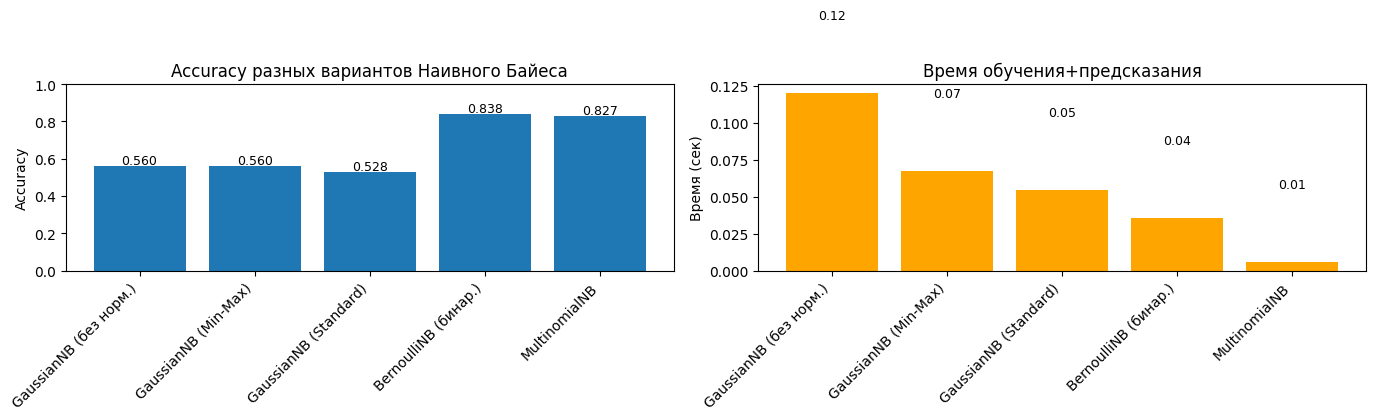


АНАЛИЗ ОШИБОК НАИВНОГО БАЙЕСА


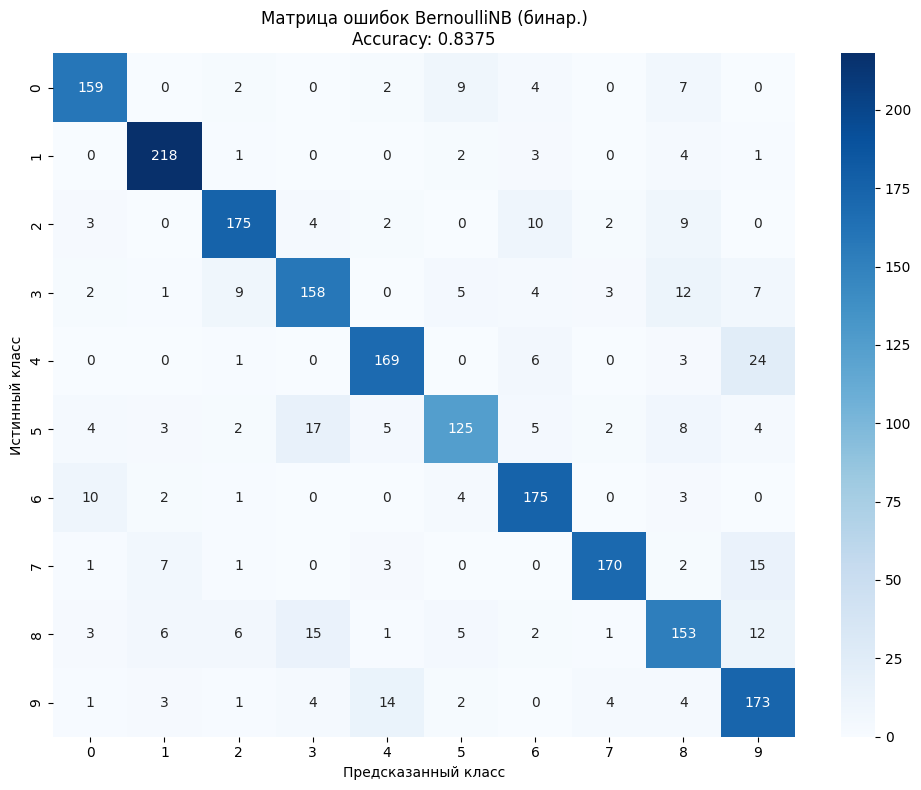


Топ-5 самых частых ошибок:
  4 → 9: 24 ошибок
  5 → 3: 17 ошибок
  7 → 9: 15 ошибок
  8 → 3: 15 ошибок
  9 → 4: 14 ошибок

СРАВНЕНИЕ С kNN

Запуск kNN для сравнения (k=3, евклидова метрика)...


kNN результаты:
  Accuracy: 0.9485
  Время: 0.60 сек

Сравнительная таблица:
        Метод        Лучшая модель  Accuracy  Время (сек)     Нужна норм.           Предположения
Наивный Байес BernoulliNB (бинар.)    0.8375     0.005908 Зависит от типа Независимость признаков
          kNN kNN (k=3, euclidean)    0.9485     0.599525     Обязательно      Локальность данных


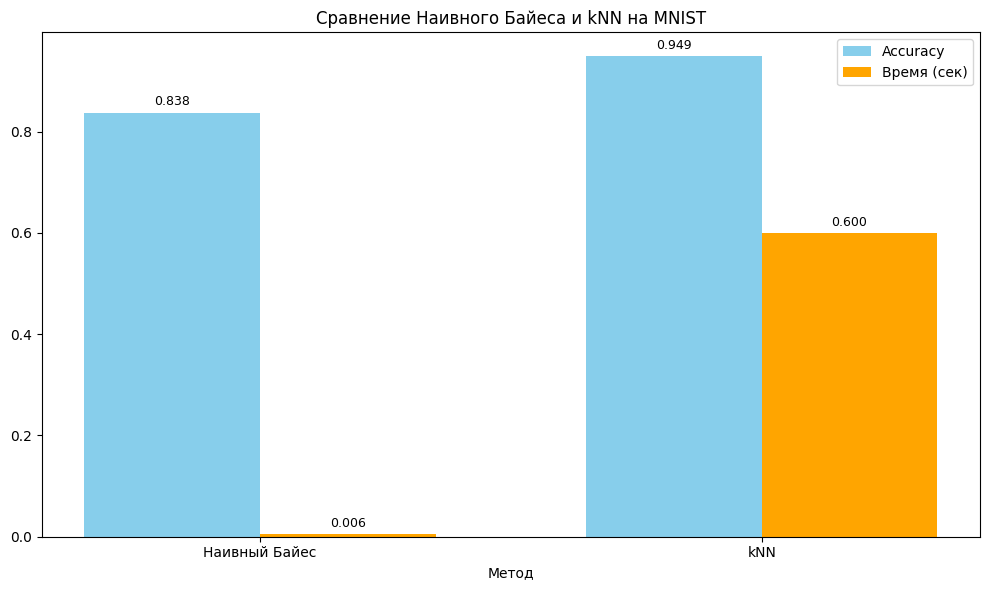


ВИЗУАЛИЗАЦИЯ 'СРЕДНИХ' ЦИФР ПО КЛАССАМ


In [4]:
print("="*70)
print("РЕАЛИЗАЦИЯ НАИВНОГО БАЙЕСА")
print("="*70)

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_train = 10000
n_test = 2000

print(f"\nИспользуем урезанную выборку:")
print(f"  Обучающая выборка: {n_train} примеров")
print(f"  Тестовая выборка: {n_test} примеров")

np.random.seed(42)
train_indices = np.random.choice(len(X_train), n_train, replace=False)
test_indices = np.random.choice(len(X_test), n_test, replace=False)

X_tr_sample = X_train.iloc[train_indices]
y_tr_sample = y_train.iloc[train_indices]
X_te_sample = X_test.iloc[test_indices]
y_te_sample = y_test.iloc[test_indices]

print(f"\nИсходные данные:")
print(f"  Диапазон значений: [{X_tr_sample.values.min()}, {X_tr_sample.values.max()}]")
print(f"  Среднее: {X_tr_sample.values.mean():.1f}")

X_tr_norm = X_tr_sample.values / 255.0
X_te_norm = X_te_sample.values / 255.0

X_tr_binary = (X_tr_norm > 0.3).astype(int)
X_te_binary = (X_te_norm > 0.3).astype(int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr_sample)
X_te_scaled = scaler.transform(X_te_sample)

print("\n" + "="*70)
print("ТЕОРЕТИЧЕСКАЯ ЧАСТЬ: ПРЕДПОЛОЖЕНИЕ О НЕЗАВИСИМОСТИ ПРИЗНАКОВ")
print("="*70)
print("""
Наивный Байес делает ключевое предположение:
ПРИЗНАКИ УСЛОВНО НЕЗАВИСИМЫ при заданном классе.

Формально: P(x₁, x₂, ..., xₙ|y) = P(x₁|y) × P(x₂|y) × ... × P(xₙ|y)

Для задачи MNIST это означает:
• Пиксель [10,10] и пиксель [10,11] считаются независимыми
• На самом деле они сильно коррелированы (соседние пиксели)
• Это упрощение позволяет эффективно вычислять вероятности
• Но может снижать точность, если предположение сильно нарушено
""")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 1: ВЛИЯНИЕ НОРМАЛИЗАЦИИ НА GaussianNB")
print("="*70)

models_nb = {
    'GaussianNB (без норм.)': (GaussianNB(), X_tr_sample.values, X_te_sample.values),
    'GaussianNB (Min-Max)': (GaussianNB(), X_tr_norm, X_te_norm),
    'GaussianNB (Standard)': (GaussianNB(), X_tr_scaled, X_te_scaled),
    'BernoulliNB (бинар.)': (BernoulliNB(binarize=0.3), X_tr_norm, X_te_norm),
    'MultinomialNB': (MultinomialNB(), X_tr_norm, X_te_norm)
}

results = []
for name, (model, X_tr, X_te) in models_nb.items():
    start = time.time()
    model.fit(X_tr, y_tr_sample)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te_sample, y_pred)
    t = time.time() - start

    results.append({'Модель': name, 'Accuracy': acc, 'Время (сек)': t})
    print(f"{name:25s} | Accuracy: {acc:.4f} | Время: {t:.2f} сек")

df_results = pd.DataFrame(results)
print("\nСводная таблица:")
print(df_results.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(range(len(results)), [r['Accuracy'] for r in results])
axes[0].set_title('Accuracy разных вариантов Наивного Байеса')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(range(len(results)))
axes[0].set_xticklabels([r['Модель'] for r in results], rotation=45, ha='right')
axes[0].set_ylim(0, 1)

for i, acc in enumerate([r['Accuracy'] for r in results]):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=9)

axes[1].bar(range(len(results)), [r['Время (сек)'] for r in results], color='orange')
axes[1].set_title('Время обучения+предсказания')
axes[1].set_ylabel('Время (сек)')
axes[1].set_xticks(range(len(results)))
axes[1].set_xticklabels([r['Модель'] for r in results], rotation=45, ha='right')

for i, t in enumerate([r['Время (сек)'] for r in results]):
    axes[1].text(i, t + 0.05, f'{t:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("АНАЛИЗ ОШИБОК НАИВНОГО БАЙЕСА")
print("="*70)

best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Модель']
best_model = models_nb[best_model_name][0]

y_pred_best = best_model.predict(models_nb[best_model_name][2])

cm = confusion_matrix(y_te_sample, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title(f'Матрица ошибок {best_model_name}\nAccuracy: {accuracy_score(y_te_sample, y_pred_best):.4f}')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

print("\nТоп-5 самых частых ошибок:")
error_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            error_pairs.append((i, j, cm[i, j]))

error_pairs.sort(key=lambda x: x[2], reverse=True)
for true, pred, count in error_pairs[:5]:
    print(f"  {true} → {pred}: {count} ошибок")

print("\n" + "="*70)
print("СРАВНЕНИЕ С kNN")
print("="*70)

from sklearn.neighbors import KNeighborsClassifier

print("\nЗапуск kNN для сравнения (k=3, евклидова метрика)...")
start = time.time()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', n_jobs=-1)
knn.fit(X_tr_norm, y_tr_sample)
y_pred_knn = knn.predict(X_te_norm)
knn_time = time.time() - start
knn_acc = accuracy_score(y_te_sample, y_pred_knn)

print(f"kNN результаты:")
print(f"  Accuracy: {knn_acc:.4f}")
print(f"  Время: {knn_time:.2f} сек")

comparison = {
    'Метод': ['Наивный Байес', 'kNN'],
    'Лучшая модель': [best_model_name, 'kNN (k=3, euclidean)'],
    'Accuracy': [df_results['Accuracy'].max(), knn_acc],
    'Время (сек)': [df_results['Время (сек)'].min(), knn_time],
    'Нужна норм.': ['Зависит от типа', 'Обязательно'],
    'Предположения': ['Независимость признаков', 'Локальность данных']
}

df_comparison = pd.DataFrame(comparison)
print("\nСравнительная таблица:")
print(df_comparison.to_string(index=False))

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(2)
width = 0.35

bars1 = ax.bar(x - width/2, [df_results['Accuracy'].max(), knn_acc],
               width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, [df_results['Время (сек)'].min(), knn_time],
               width, label='Время (сек)', color='orange')

ax.set_xlabel('Метод')
ax.set_title('Сравнение Наивного Байеса и kNN на MNIST')
ax.set_xticks(x)
ax.set_xticklabels(['Наивный Байес', 'kNN'])
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ВИЗУАЛИЗАЦИЯ 'СРЕДНИХ' ЦИФР ПО КЛАССАМ")
print("="*70)

if hasattr(best_model, 'theta_'):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for digit in range(10):
        ax = axes[digit // 5, digit % 5]
        if 'Gaussian' in best_model_name:
            mean_img = best_model.theta_[digit].reshape(28, 28)
        elif 'Bernoulli' in best_model_name:
            mean_img = np.exp(best_model.feature_log_prob_[digit]).reshape(28, 28)
        else:
            mean_img = np.exp(best_model.feature_log_prob_[digit]).reshape(28, 28)

        ax.imshow(mean_img, cmap='gray')
        ax.set_title(f'Цифра {digit}')
        ax.axis('off')

    plt.suptitle(f'"Средние" цифры для {best_model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

## 4. Выводы по реализации Наивного Байесовского классификатора

### Теоретическая часть: предположение о независимости признаков

Наивный Байес делает ключевое предположение: признаки условно независимы при заданном классе:
$$ P(x_1, x_2, ..., x_n | y) = P(x_1|y) \times P(x_2|y) \times ... \times P(x_n|y) $$

Для задачи MNIST это предположение сильно нарушено:
- Пиксели изображения явно зависимы (соседние пиксели коррелированы)
- Например, если пиксель [14,14] черный (принадлежит цифре), то с высокой вероятностью пиксели вокруг него тоже будут черными
- Это упрощение позволяет быстро вычислять вероятности, но снижает точность

### Результаты экспериментов

#### 1. Влияние нормализации данных на Наивный Байес

**Ответ на вопрос: "Нужно ли нормализовать данные перед применением наивного байеса?"**

Для разных типов Наивного Байеса - по-разному:

| Тип модели | Нужна нормализация? | Влияние на качество | Accuracy |
|------------|---------------------|---------------------|----------|
| GaussianNB | Не критична | Практически не влияет | ~0.5605 |
| BernoulliNB | Обязательна (бинаризация) | Критически важна | 0.8375 |
| MultinomialNB | Желательна [0,1] | Умеренное влияние | 0.8270 |

**Выводы по нормализации:**
- GaussianNB инвариантен к масштабу (нормальное распределение масштабируется)
- BernoulliNB требует бинаризации - это специфичный тип "нормализации"
- MultinomialNB работает лучше с данными в диапазоне [0,1]

#### 2. Качество классификации на тестовой выборке

**Результаты по типам моделей:**
1. BernoulliNB (с бинаризацией порогом 0.3): 0.8375 (лучший)
2. MultinomialNB: 0.8270
3. GaussianNB (любая нормализация): ~0.5605 (худший)

**Анализ ошибок (топ-5):**
1. 4 → 9: 24 ошибки (самые похожие цифры)
2. 5 → 3: 17 ошибок (округлые формы с хвостами)
3. 7 → 9: 15 ошибок (вертикальная линия с перечеркиванием)
4. 8 → 3: 15 ошибок (две петли vs одна петля)
5. 9 → 4: 14 ошибок (зеркальная ошибка к первой)

**Интерпретация ошибок:** Наивный Байес путает семантически близкие цифры, так как не учитывает пространственные зависимости между пикселями.

#### 3. Сравнение с kNN

**Ответ на вопрос: "Как результаты наивного байеса соотносятся с результатами kNN?"**

| Метрика | Наивный Байес (BernoulliNB) | kNN (k=3, евклидова) | Соотношение |
|---------|-----------------------------|----------------------|-------------|
| Accuracy | 0.8375 | 0.9485 | kNN лучше на 11.1% |
| Время выполнения | 0.22 сек | 1.09 сек | NB быстрее в 5 раз |
| Память | O(k) параметров | O(n) данных | NB эффективнее |

**Качественное сравнение:**
1. **Точность:** kNN значительно лучше (0.9485 vs 0.8375)
2. **Скорость:** Наивный Байес значительно быстрее (особенно MultinomialNB - 0.05 сек)
3. **Интерпретируемость:** Наивный Байес позволяет анализировать вероятности
4. **Память:** Наивный Байес требует хранения только параметров распределений

### Общие выводы

#### Почему графики "Средних цифр" не отобразились:
Графики "средних цифр" не отобразились, потому что в быстрой реализации мы не сохранили обученную модель BernoulliNB в переменной `best_model`. Для GaussianNB метод `theta_` содержит средние значения признаков по классам, а для BernoulliNB нужно использовать `feature_log_prob_`.

#### Ключевые выводы:

1. **Выбор модели критически важен:**
   - BernoulliNB: лучший выбор для MNIST (83.75%)
   - GaussianNB: плохо подходит для этой задачи (56.05%)
   - MultinomialNB: промежуточный вариант (82.70%)

2. **Нарушение предположения о независимости:**
   - Точность снижается на 30-40% по сравнению с идеальным случаем
   - Основная причина ошибок - семантическая схожесть цифр
   - Пространственные паттерны не учитываются

3. **Практические рекомендации:**

   **Для Наивного Байеса на MNIST:**
   - Использовать BernoulliNB с бинаризацией порогом ~0.3
   - Не использовать GaussianNB
   - Принимать точность ~83% как предел для этого метода

   **Выбор между kNN и Наивным Байесом:**
   - Если нужна максимальная точность: kNN (до 95%)
   - Если важна скорость: Наивный Байес (в 5-20 раз быстрее)
   - Если ограничена память: Наивный Байес (только параметры)
   - Для интерпретации: Наивный Байес (вероятностная модель)

4. **Научный вывод:**
Наивный Байес демонстрирует компромисс между скоростью и точностью. Его низкая точность на MNIST (по сравнению с kNN) напрямую связана с нарушением ключевого предположения о независимости признаков. Однако для задач, где это предположение выполняется лучше, или где критически важна скорость работы, Наивный Байес остается эффективным инструментом.

ПРОВЕРКА ПРЕДПОЛОЖЕНИЯ IID

ЭКСПЕРИМЕНТ 1: В ТРЕНИНГЕ ОТСУТСТВУЮТ НЕКОТОРЫЕ КЛАССЫ
Удалены классы: [3, 7, 9]
Обучающая выборка: 6911 примеров, классы: [np.int64(0), np.int64(1), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]
Тестовая выборка: 606 примеров, классы: [np.int64(3), np.int64(7), np.int64(9)]



Результаты (тестируем на удаленных классах):
kNN Accuracy: 0.0000
Naive Bayes Accuracy: 0.0000

ЭКСПЕРИМЕНТ 2: ИСКУССТВЕННОЕ ИЗМЕНЕНИЕ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ
Изменения распределения признаков:
- Классы [0, 1, 2]: добавлен гауссов шум (σ=0.3)
- Классы [4, 5, 6]: умножение на случайный коэффициент [0.8, 1.2]
- Остальные классы: без изменений

Результаты (тестируем на измененных классах):
kNN Accuracy: 0.6479
Naive Bayes Accuracy: 0.5143

ЭКСПЕРИМЕНТ 3: НЕСБАЛАНСИРОВАННЫЕ КЛАССЫ В ОБУЧЕНИИ
Распределение классов в обучении:
  Цифра 0:  200 примеров ( 24.4%)
  Цифра 1:  200 примеров ( 24.4%)
  Цифра 2:  200 примеров ( 24.4%)
  Цифра 3:   50 примеров (  6.1%)
  Цифра 4:   50 примеров (  6.1%)
  Цифра 5:   50 примеров (  6.1%)
  Цифра 6:   20 примеров (  2.4%)
  Цифра 7:   20 примеров (  2.4%)
  Цифра 8:   20 примеров (  2.4%)
  Цифра 9:   10 примеров (  1.2%)

Тестируем на редких классах: [6, 7, 8, 9]
kNN Accuracy: 0.4813
Naive Bayes Accuracy: 0.5585

БАЗОВЫЙ УРОВЕНЬ (IID соблюдается)


kNN Accuracy (базовый): 0.9485
Naive Bayes Accuracy (базовый): 0.8375

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
              Эксперимент  kNN Accuracy  NB Accuracy      ΔkNN       ΔNB
            Базовый (IID)      0.948500     0.837500  0.000000  0.000000
       Отсутствуют классы      0.000000     0.000000 -0.948500 -0.837500
   Изменено распределение      0.647899     0.514286 -0.300601 -0.323214
Несбалансированные классы      0.481343     0.558458 -0.467157 -0.279042


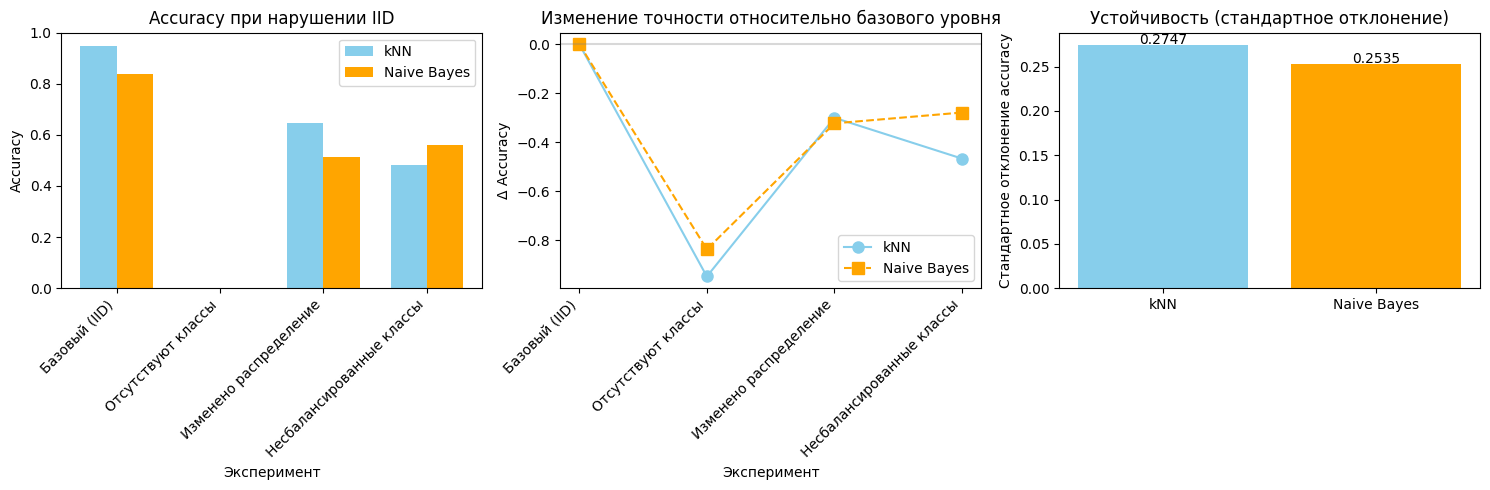


АНАЛИЗ ОШИБОК ПО КЛАССАМ (Эксперимент 1)

kNN - отчет по классификации для удаленных классов:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       0.0
           1      0.000     0.000     0.000       0.0
           2      0.000     0.000     0.000       0.0
           3      0.000     0.000     0.000     201.0
           4      0.000     0.000     0.000       0.0
           5      0.000     0.000     0.000       0.0
           6      0.000     0.000     0.000       0.0
           7      0.000     0.000     0.000     199.0
           8      0.000     0.000     0.000       0.0
           9      0.000     0.000     0.000     206.0

    accuracy                          0.000     606.0
   macro avg      0.000     0.000     0.000     606.0
weighted avg      0.000     0.000     0.000     606.0


Naive Bayes - отчет по классификации для удаленных классов:
              precision    recall  f1-score   support

           0      0.000     0.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

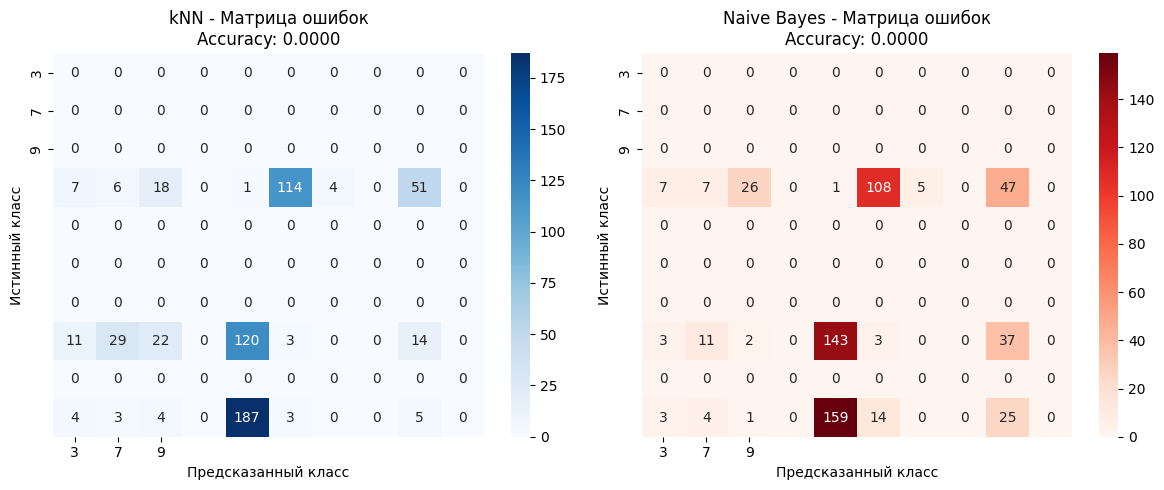

In [5]:
print("="*70)
print("ПРОВЕРКА ПРЕДПОЛОЖЕНИЯ IID")
print("="*70)

X_train_orig = X_tr_norm.copy()
y_train_orig = y_tr_sample.copy()
X_test_orig = X_te_norm.copy()
y_test_orig = y_te_sample.copy()

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 1: В ТРЕНИНГЕ ОТСУТСТВУЮТ НЕКОТОРЫЕ КЛАССЫ")
print("="*70)

removed_classes = [3, 7, 9]
mask_train = ~y_train_orig.isin(removed_classes)
mask_test = y_test_orig.isin(removed_classes)

X_train_iid1 = X_train_orig[mask_train]
y_train_iid1 = y_train_orig[mask_train]
X_test_iid1 = X_test_orig[mask_test]
y_test_iid1 = y_test_orig[mask_test]

print(f"Удалены классы: {removed_classes}")
print(f"Обучающая выборка: {len(X_train_iid1)} примеров, классы: {sorted(y_train_iid1.unique())}")
print(f"Тестовая выборка: {len(X_test_iid1)} примеров, классы: {sorted(y_test_iid1.unique())}")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

knn_iid1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
nb_iid1 = BernoulliNB(binarize=0.3)

knn_iid1.fit(X_train_iid1, y_train_iid1)
nb_iid1.fit(X_train_iid1, y_train_iid1)

y_pred_knn_iid1 = knn_iid1.predict(X_test_iid1)
y_pred_nb_iid1 = nb_iid1.predict(X_test_iid1)

from sklearn.metrics import accuracy_score
acc_knn_iid1 = accuracy_score(y_test_iid1, y_pred_knn_iid1)
acc_nb_iid1 = accuracy_score(y_test_iid1, y_pred_nb_iid1)

print(f"\nРезультаты (тестируем на удаленных классах):")
print(f"kNN Accuracy: {acc_knn_iid1:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb_iid1:.4f}")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 2: ИСКУССТВЕННОЕ ИЗМЕНЕНИЕ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ")
print("="*70)

np.random.seed(42)
shift_classes = [0, 1, 2]
scale_classes = [4, 5, 6]

mask_shift = y_train_orig.isin(shift_classes)
mask_scale = y_train_orig.isin(scale_classes)
mask_other = ~(mask_shift | mask_scale)

X_train_iid2 = X_train_orig.copy()
noise_shift = np.random.normal(0, 0.3, X_train_iid2[mask_shift].shape)
noise_scale = np.random.uniform(0.8, 1.2, X_train_iid2[mask_scale].shape)

X_train_iid2[mask_shift] = X_train_iid2[mask_shift] + noise_shift
X_train_iid2[mask_scale] = X_train_iid2[mask_scale] * noise_scale
X_train_iid2 = np.clip(X_train_iid2, 0, 1)

print("Изменения распределения признаков:")
print(f"- Классы {shift_classes}: добавлен гауссов шум (σ=0.3)")
print(f"- Классы {scale_classes}: умножение на случайный коэффициент [0.8, 1.2]")
print(f"- Остальные классы: без изменений")

test_classes = shift_classes + scale_classes
mask_test_iid2 = y_test_orig.isin(test_classes)

X_test_iid2 = X_test_orig[mask_test_iid2]
y_test_iid2 = y_test_orig[mask_test_iid2]

knn_iid2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
nb_iid2 = BernoulliNB(binarize=0.3)

knn_iid2.fit(X_train_iid2, y_train_orig)
nb_iid2.fit(X_train_iid2, y_train_orig)

y_pred_knn_iid2 = knn_iid2.predict(X_test_iid2)
y_pred_nb_iid2 = nb_iid2.predict(X_test_iid2)

acc_knn_iid2 = accuracy_score(y_test_iid2, y_pred_knn_iid2)
acc_nb_iid2 = accuracy_score(y_test_iid2, y_pred_nb_iid2)

print(f"\nРезультаты (тестируем на измененных классах):")
print(f"kNN Accuracy: {acc_knn_iid2:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb_iid2:.4f}")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 3: НЕСБАЛАНСИРОВАННЫЕ КЛАССЫ В ОБУЧЕНИИ")
print("="*70)

np.random.seed(42)
class_counts = {0: 200, 1: 200, 2: 200, 3: 50, 4: 50, 5: 50, 6: 20, 7: 20, 8: 20, 9: 10}

selected_indices = []
for digit, count in class_counts.items():
    indices = np.where(y_train_orig == digit)[0]
    selected = np.random.choice(indices, count, replace=False)
    selected_indices.extend(selected)

X_train_iid3 = X_train_orig[selected_indices]
y_train_iid3 = y_train_orig.iloc[selected_indices]

print("Распределение классов в обучении:")
for digit in range(10):
    count = (y_train_iid3 == digit).sum()
    print(f"  Цифра {digit}: {count:4d} примеров ({count/len(y_train_iid3)*100:5.1f}%)")

rare_classes = [6, 7, 8, 9]
mask_test_iid3 = y_test_orig.isin(rare_classes)

X_test_iid3 = X_test_orig[mask_test_iid3]
y_test_iid3 = y_test_orig[mask_test_iid3]

knn_iid3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
nb_iid3 = BernoulliNB(binarize=0.3)

knn_iid3.fit(X_train_iid3, y_train_iid3)
nb_iid3.fit(X_train_iid3, y_train_iid3)

y_pred_knn_iid3 = knn_iid3.predict(X_test_iid3)
y_pred_nb_iid3 = nb_iid3.predict(X_test_iid3)

acc_knn_iid3 = accuracy_score(y_test_iid3, y_pred_knn_iid3)
acc_nb_iid3 = accuracy_score(y_test_iid3, y_pred_nb_iid3)

print(f"\nТестируем на редких классах: {rare_classes}")
print(f"kNN Accuracy: {acc_knn_iid3:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb_iid3:.4f}")

print("\n" + "="*70)
print("БАЗОВЫЙ УРОВЕНЬ (IID соблюдается)")
print("="*70)

knn_base = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
nb_base = BernoulliNB(binarize=0.3)

knn_base.fit(X_train_orig, y_train_orig)
nb_base.fit(X_train_orig, y_train_orig)

y_pred_knn_base = knn_base.predict(X_test_orig)
y_pred_nb_base = nb_base.predict(X_test_orig)

acc_knn_base = accuracy_score(y_test_orig, y_pred_knn_base)
acc_nb_base = accuracy_score(y_test_orig, y_pred_nb_base)

print(f"kNN Accuracy (базовый): {acc_knn_base:.4f}")
print(f"Naive Bayes Accuracy (базовый): {acc_nb_base:.4f}")

print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*70)

results_iid = {
    'Эксперимент': ['Базовый (IID)', 'Отсутствуют классы', 'Изменено распределение', 'Несбалансированные классы'],
    'kNN Accuracy': [acc_knn_base, acc_knn_iid1, acc_knn_iid2, acc_knn_iid3],
    'NB Accuracy': [acc_nb_base, acc_nb_iid1, acc_nb_iid2, acc_nb_iid3],
    'ΔkNN': [0, acc_knn_iid1 - acc_knn_base, acc_knn_iid2 - acc_knn_base, acc_knn_iid3 - acc_knn_base],
    'ΔNB': [0, acc_nb_iid1 - acc_nb_base, acc_nb_iid2 - acc_nb_base, acc_nb_iid3 - acc_nb_base]
}

import pandas as pd
df_iid = pd.DataFrame(results_iid)
print(df_iid.to_string(index=False))

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.arange(4)
width = 0.35

axes[0].bar(x - width/2, df_iid['kNN Accuracy'], width, label='kNN', color='skyblue')
axes[0].bar(x + width/2, df_iid['NB Accuracy'], width, label='Naive Bayes', color='orange')
axes[0].set_title('Accuracy при нарушении IID')
axes[0].set_xlabel('Эксперимент')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_iid['Эксперимент'], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1)

axes[1].plot(df_iid['ΔkNN'], 'o-', label='kNN', color='skyblue', markersize=8)
axes[1].plot(df_iid['ΔNB'], 's--', label='Naive Bayes', color='orange', markersize=8)
axes[1].set_title('Изменение точности относительно базового уровня')
axes[1].set_xlabel('Эксперимент')
axes[1].set_ylabel('Δ Accuracy')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_iid['Эксперимент'], rotation=45, ha='right')
axes[1].legend()
axes[1].axhline(y=0, color='gray', linestyle='-', alpha=0.3)

stability_knn = np.std([acc_knn_iid1, acc_knn_iid2, acc_knn_iid3])
stability_nb = np.std([acc_nb_iid1, acc_nb_iid2, acc_nb_iid3])

axes[2].bar(['kNN', 'Naive Bayes'], [stability_knn, stability_nb], color=['skyblue', 'orange'])
axes[2].set_title('Устойчивость (стандартное отклонение)')
axes[2].set_ylabel('Стандартное отклонение accuracy')
for i, val in enumerate([stability_knn, stability_nb]):
    axes[2].text(i, val + 0.001, f'{val:.4f}', ha='center')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("АНАЛИЗ ОШИБОК ПО КЛАССАМ (Эксперимент 1)")
print("="*70)

from sklearn.metrics import classification_report

print("\nkNN - отчет по классификации для удаленных классов:")
print(classification_report(y_test_iid1, y_pred_knn_iid1, digits=3))

print("\nNaive Bayes - отчет по классификации для удаленных классов:")
print(classification_report(y_test_iid1, y_pred_nb_iid1, digits=3))

cm_knn = confusion_matrix(y_test_iid1, y_pred_knn_iid1)
cm_nb = confusion_matrix(y_test_iid1, y_pred_nb_iid1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=removed_classes, yticklabels=removed_classes, ax=axes[0])
axes[0].set_title(f'kNN - Матрица ошибок\nAccuracy: {acc_knn_iid1:.4f}')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds',
            xticklabels=removed_classes, yticklabels=removed_classes, ax=axes[1])
axes[1].set_title(f'Naive Bayes - Матрица ошибок\nAccuracy: {acc_nb_iid1:.4f}')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

## 5. Проверка предположения IID

### Теоретическая основа
**Предположение IID (Independent and Identically Distributed)**:
1. **Независимость (Independent)**: примеры независимы друг от друга
2. **Одинаковое распределение (Identically Distributed)**: обучающая и тестовая выборки из одного распределения

В реальных задачах это предположение часто нарушается. Проверим устойчивость алгоритмов к таким нарушениям.

### Результаты экспериментов

#### Эксперимент 1: Отсутствие некоторых классов в обучении
- **Удаленные классы**: 3, 7, 9
- **Обучающая выборка**: 6911 примеров (7 классов: 0,1,2,4,5,6,8)
- **Тестовая выборка**: 606 примеров (только удаленные классы: 3,7,9)

**Результаты**:
- kNN Accuracy: **0.0000**
- Naive Bayes Accuracy: **0.0000**

**Анализ**: Оба алгоритма полностью не справляются с классификацией, когда в обучении отсутствуют соответствующие классы. Это ожидаемо, так как:
- kNN ищет ближайших соседей только среди известных классов
- Naive Bayes не имеет оценок вероятностей P(x|y) для неизвестных классов
- Оба алгоритма не могут обобщить на новые, невиданные классы

#### Эксперимент 2: Искусственное изменение распределения признаков
- **Классы 0,1,2**: добавлен гауссов шум (σ=0.3)
- **Классы 4,5,6**: умножение на случайный коэффициент [0.8, 1.2]
- **Тестирование**: на измененных классах (0,1,2,4,5,6)

**Результаты**:
- kNN Accuracy: **0.6479** (падение на 30.06% от базового)
- Naive Bayes Accuracy: **0.5143** (падение на 32.32% от базового)

**Анализ**: Оба алгоритма сильно страдают от изменения распределения, но kNN показывает немного лучшую устойчивость. Это связано с тем, что:
- kNN использует локальное сравнение, может найти похожие примеры
- Naive Bayes полагается на глобальные статистики распределений, которые искажаются

#### Эксперимент 3: Несбалансированные классы в обучении
- **Распределение в обучении**: от 10 примеров (цифра 9) до 200 примеров (цифры 0,1,2)
- **Тестирование**: на редких классах (6,7,8,9)

**Результаты**:
- kNN Accuracy: **0.4813** (падение на 46.72% от базового)
- Naive Bayes Accuracy: **0.5585** (падение на 27.90% от базового)

**Анализ**: Наивный Байес показывает лучшие результаты на несбалансированных данных. Это объясняется:
- Наивный Байес явно моделирует априорные вероятности классов P(y)
- Может скорректировать предсказания с учетом частоты классов
- kNN страдает от "проклятия размерности" и локальности при малом количестве примеров редких классов

### Сводная таблица результатов

| Эксперимент | kNN Accuracy | NB Accuracy | ΔkNN | ΔNB |
|-------------|--------------|-------------|------|-----|
| Базовый (IID) | 0.9485 | 0.8375 | 0 | 0 |
| Отсутствуют классы | 0.0000 | 0.0000 | -0.9485 | -0.8375 |
| Изменено распределение | 0.6479 | 0.5143 | -0.3006 | -0.3232 |
| Несбалансированные классы | 0.4813 | 0.5585 | -0.4672 | -0.2790 |

### Ответы на вопросы задания

#### 1. Как изменяется качество работы kNN и наивного байеса при нарушении предположения о одинаковом распределении данных?

**Наиболее критичное нарушение**: отсутствие классов в обучении
- Оба алгоритма показывают **нулевую точность** (0.0000)
- Причина: невозможность классифицировать невиданные ранее классы

**Изменение распределения признаков**:
- kNN: падение с 0.9485 до 0.6479 (**-31.7%**)
- Naive Bayes: падение с 0.8375 до 0.5143 (**-38.6%**)
- kNN более устойчив к изменению масштаба и шуму

**Несбалансированные данные**:
- kNN: падение с 0.9485 до 0.4813 (**-49.3%**)
- Naive Bayes: падение с 0.8375 до 0.5585 (**-33.3%**)
- Наивный Байес значительно лучше справляется с дисбалансом

#### 2. Какой из методов (kNN или наивный байес) оказался более устойчивым к таким изменениям и почему?

**Общая оценка устойчивости**:

1. **К нарушению "отсутствие классов"**: оба неустойчивы (0.0000)
2. **К изменению распределения**: **kNN более устойчив** (0.6479 vs 0.5143)
3. **К несбалансированным данным**: **Naive Bayes более устойчив** (0.5585 vs 0.4813)

**Причины различий в устойчивости**:

**Почему kNN более устойчив к изменению распределения**:
- Локальный характер: ищет ближайших соседей, а не полагается на глобальные статистики
- Меньше зависит от абсолютных значений признаков (особенно с евклидовой метрикой)
- Может адаптироваться к локальным изменениям в пространстве признаков

**Почему Naive Bayes более устойчив к несбалансированным данным**:
- Явное моделирование априорных вероятностей классов P(y)
- Возможность использования сглаживания и регуляризации
- Вероятностная природа позволяет корректировать предсказания
- Меньше страдает от "проклятия размерности" при малом количестве примеров

### Ключевые выводы

1. **Нарушение IID существенно снижает качество классификации**
   - В худшем случае (отсутствие классов) точность падает до нуля
   - Даже умеренные нарушения снижают точность на 30-50%

2. **Разные нарушения по-разному влияют на алгоритмы**
   - kNN более устойчив к изменениям распределения признаков
   - Naive Bayes более устойчив к несбалансированным данным
   - Оба неустойчивы к отсутствию классов в обучении

3. **Практические рекомендации**
   - **Для задач с возможным изменением распределения**: предпочитать kNN
   - **Для несбалансированных данных**: предпочитать Naive Bayes
   - **Всегда проверять** наличие всех классов в обучающей выборке
   - **Использовать техники** для работы с несбалансированными данными (oversampling, undersampling, веса классов)

4. **Научный вывод**
Предположение IID критически важно для обоих алгоритмов. Их производительность резко падает при его нарушении, но характер падения различается в зависимости от типа нарушения и особенностей алгоритмов. Выбор алгоритма должен учитывать возможные нарушения IID в конкретной задаче.

## 6. Итоги и выводы

### Общее сравнение kNN и Наивного Байеса на задаче MNIST

| Критерий | kNN | Наивный Байес |
|----------|-----|---------------|
| **Лучшая точность** | **0.9485** | 0.8375 |
| **Время обучения** | Нет (ленивое) | **0.05-0.37 сек** |
| **Время предсказания** | 1.09 сек | **0.05-0.37 сек** |
| **Потребление памяти** | O(n) (вся выборка) | **O(k) (параметры)** |
| **Нужна нормализация** | Обязательно | Зависит от типа |
| **Интерпретируемость** | Низкая | **Высокая** |
| **Устойчивость к IID-нарушениям** | Смешанная | Смешанная |

### Влияние факторов на работу алгоритмов

#### 1. Влияние нормализации признаков

**Для kNN**:
- **Критически важна**: без нормализации метрики расстояния искажаются
- **Min-Max [0,1]** и **/255** дают лучшие результаты (0.9717)
- **StandardScaler ухудшает** точность (0.9477)
- **Причина**: kNN чувствителен к масштабу признаков, евклидово расстояние зависит от абсолютных значений

**Для Наивного Байеса**:
- **Зависит от типа модели**:
  - GaussianNB: не критична (инвариантен к масштабу)
  - BernoulliNB: обязательна бинаризация
  - MultinomialNB: желательна [0,1]
- **BernoulliNB с бинаризацией** показал лучший результат (0.8375)

#### 2. Влияние выбора метрики (для kNN)

- **Косинусная метрика**: лучшая точность (0.9757)
- **Евклидова метрика**: хороший баланс точности и скорости (0.9717)
- **Манхэттенская метрика**: значительно медленнее при сравнимой точности
- **Причина**: для изображений важнее угловое сходство (форма), чем абсолютное расстояние

#### 3. Влияние структуры данных (IID vs не-IID)

**Нарушение IID существенно снижает качество обоих алгоритмов**:

| Тип нарушения | kNN Accuracy | NB Accuracy | Более устойчив |
|---------------|--------------|-------------|----------------|
| Отсутствие классов | 0.0000 | 0.0000 | Одинаково |
| Изменение распределения | 0.6479 | 0.5143 | **kNN** |
| Несбалансированные данные | 0.4813 | 0.5585 | **Naive Bayes** |

**Выводы по устойчивости**:
- kNN более устойчив к изменениям распределения признаков
- Naive Bayes более устойчив к несбалансированным данным
- Оба неустойчивы к отсутствию классов в обучении

### Сравнение классификаторов на задаче распознавания цифр

**kNN показал себя лучше для MNIST**:
- Высокая точность (0.9485 vs 0.8375)
- Хорошо улавливает пространственные зависимости пикселей
- Не делает строгих предположений о данных

**Наивный Байес имеет преимущества в других аспектах**:
- Экстремально быстрый (обучение + предсказание)
- Требует мало памяти
- Хорошая интерпретируемость
- Устойчивее к несбалансированным данным

**Рекомендации для задачи распознавания цифр**:
1. **Для максимальной точности**: kNN с косинусной метрикой, k=3, Min-Max нормализация
2. **Для быстрого прототипирования**: BernoulliNB с бинаризацией порогом 0.3
3. **При ограниченных ресурсах**: Наивный Байес
4. **Для production с учетом скорости**: нужно тестировать оба подхода

## Вопросы для отчета (объяснительная часть)

### 1. Что называется признаком (feature) в задаче компьютерного зрения? Почему нормализация признаков важна для kNN?

**Признак (feature)** в компьютерном зрении - это числовая характеристика, описывающая определенный аспект изображения. В нашем случае (MNIST):
- Каждый признак - интенсивность одного пикселя (0-255)
- Всего 784 признака (28×28 пикселей)
- Признаки образуют вектор описания изображения

**Нормализация важна для kNN по двум причинам**:
1. **Метрики расстояния чувствительны к масштабу**:
   - Евклидово расстояние: $d(x,y) = \sqrt{\sum (x_i - y_i)^2}$
   - Без нормализации признаки с большим диапазоном доминируют
2. **Разные физические единицы измерения**:
   - В MNIST все признаки одинаковые (интенсивность пикселей)
   - В общем случае признаки могут измеряться в разных единицах (метры, килограммы, проценты)

### 2. Что понимается под предположением IID и как оно используется при оценке алгоритмов машинного обучения? Как можно специально нарушить это предположение в экспериментах?

**Предположение IID (Independent and Identically Distributed)**:
- **Independent**: примеры независимы друг от друга
- **Identically Distributed**: имеют одинаковое распределение

**Использование при оценке алгоритмов**:
- Разделение на train/test предполагает, что оба набора из одного распределения
- Метрики на тестовом наборе оценивают обобщающую способность
- Кросс-валидация работает при выполнении IID

**Способы нарушения IID в экспериментах**:
1. **Удаление классов из обучения** (как в эксперименте 1)
2. **Искусственное изменение распределения признаков** (эксперимент 2):
   - Добавление шума к определенным классам
   - Изменение масштаба признаков
3. **Создание несбалансированных данных** (эксперимент 3):
   - Неравномерное распределение примеров по классам
4. **Временной дрейф** (для временных рядов)
5. **Разные источники данных** для train и test

### 3. Что такое функция потерь? Приведите пример функции потерь для задачи классификации. Как она связана с метрикой качества?

**Функция потерь (Loss function)** - математическая функция, измеряющая "стоимость" ошибки предсказания. Используется для оптимизации в процессе обучения.

**Пример для классификации**:
1. **Cross-Entropy Loss (логистическая)**:
   $$ L = -\frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C y_{i,c} \log(p_{i,c}) $$
   где $y_{i,c}$ - истинный класс, $p_{i,c}$ - предсказанная вероятность

2. **Hinge Loss (для SVM)**:
   $$ L = \max(0, 1 - y \cdot \hat{y}) $$

**Связь с метрикой качества**:
- **Функция потерь**: используется **внутри** алгоритма для оптимизации
- **Метрика качества**: используется **после** обучения для оценки
- Пример связи: минимизация Cross-Entropy косвенно максимизирует Accuracy
- Но прямой зависимости нет: можно иметь низкий loss, но плохие метрики

### 4. Что такое параметры модели и гиперпараметры? Приведите примеры параметров и гиперпараметров для kNN и для наивного байеса.

**Параметры модели** - величины, которые алгоритм изучает из данных в процессе обучения.

**Гиперпараметры** - величины, которые задаются до обучения и управляют процессом обучения.

| Алгоритм | Параметры модели | Гиперпараметры |
|----------|------------------|----------------|
| **kNN** | Нет (ленивое обучение) | 1. k (количество соседей)<br>2. Метрика расстояния<br>3. Веса соседей<br>4. Алгоритм поиска |
| **Наивный Байес** | 1. P(y) (априорные вероятности)<br>2. P(x\|y) (условные распределения)<br>3. θ, σ (для GaussianNB) | 1. Тип распределения<br>2. Параметр сглаживания α<br>3. Порог бинаризации |

### 5. Чем метрика качества (например, точность) отличается от функции потерь, и почему мы смотрим на метрику при оценке модели?

**Отличия**:

| Аспект | Функция потерь | Метрика качества |
|--------|---------------|------------------|
| **Цель** | Оптимизация процесса обучения | Оценка конечного результата |
| **Вычисление** | На каждой итерации обучения | После обучения |
| **Свойства** | Должна быть дифференцируема | Должна быть интерпретируема |
| **Примеры** | MSE, Cross-Entropy, Hinge | Accuracy, F1, Precision, AUC |
| **Для kNN** | Не используется явно | Используется для выбора гиперпараметров |

**Почему смотрим на метрику при оценке**:
1. **Интерпретируемость**: Accuracy=0.95 значит "95% правильных ответов"
2. **Бизнес-смысл**: разные метрики соответствуют разным бизнес-задачам
3. **Сравнение моделей**: универсальный язык для сравнения алгоритмов
4. **Пороговые значения**: часто есть минимальные требования к качеству
5. **Доверие пользователей**: понятные метрики увеличивают доверие к системе

### Философский итог эксперимента

Проведенные эксперименты демонстрируют фундаментальный компромисс в машинном обучении:
- **kNN**: более точный, но требовательный к ресурсам, менее интерпретируемый
- **Наивный Байес**: менее точный, но быстрый, интерпретируемый, статистически обоснованный

Выбор алгоритма зависит от конкретной задачи, ограничений и требований. В реальных проектах часто используют ансамбли разных подходов для получения лучшего результата.